In [ ]:
!pip install -q keras




Keras comes with a library called datasets, which you can use to load datasets out of the box: you download the data from the server and speeds up the process since you no longer have to download the data to your computer. 




The train and test images along with the labels are loaded and stored in variables train_X, train_Y, test_X, test_Y, respectively.

In [ ]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

 

4423680/4422102 [==============================] - 0s 0us/step


**FASHION MNIST DATASET**

The Fashion-MNIST clothing classification problem is a new standard dataset used in computer vision and deep learning.

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.


Although the dataset is relatively simple, it can be used as the basis for learning and practicing how to develop, evaluate, and use deep convolutional neural networks for image classification from scratch.  



Homepage: https://github.com/zalandoresearch/fashion-mnist






**LABEL DESCRIPTION**

Every three line contains a new category
The categories are named in numbers but the names can be

<p>
<UL>
 
0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

</UL>
</p>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

 



The training data has a shape of 60000 x 28 x 28 since there are 60,000 training samples each of 28 x 28 dimension. 

Similarly, the test data has a shape of 10000 x 28 x 28 since there are 10,000 testing samples.

In [ ]:
print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

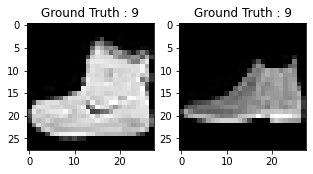

In [ ]:
# Look at the images both intrain and test

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

**Data Preprocessing**

As you could see in the above plot, the images are grayscale images have pixel values that range from 0 to 255. Also, these images have a dimension of 28 x 28. As a result, you'll need to preprocess the data before you feed it into the model.

As a first step, convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1 which is fed into the network.

In [ ]:
#reshape ()--> -1 means that the length in that dimension is inferred. 
#This is done based on the constraint that the number of elements in an ndarray or Tensor when reshaped must remain the same.
print(train_X.shape)   # before reshape

train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

train_X.shape, test_X.shape



(60000, 28, 28)


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
#Before you feed it into the network you need to convert its type to float32   (from int8)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')


#rescale the pixel values in range 0 - 1 inclusive
train_X = train_X / 255.
test_X = test_X / 255.

**ONE HOT ENCODING**

In one-hot encoding, you convert the categorical data into a vector of numbers. The reason why you convert the categorical data in one hot encoding is that machine learning algorithms cannot work with categorical data directly.

 You generate one boolean column for each category or class.
  [ 0 0 0 0 0 0 0 0 0 1 ] represents Ankle boot (class 0-9)

 Only one of these columns could take on the value 1 for each sample. Hence, the term one-hot encoding.


In [ ]:
from keras.utils import to_categorical
 

# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])
 

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


 **TEST AND VALIDATION DATASET**
 
For the model to generalize well, you split the training data into two parts, one designed for training and another one for validation. In this case, you will train the model on 80\% of the training data and validate it on 20\% of the remaining training data. This will also help to reduce overfitting since you will be validating the model on the data it would not have seen in training phase, which will help in boosting the test performance.

In [ ]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

#check size of train and validation dataset
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

**CNN ARCHITECTURE DESIGN**


The images are of size 28 x 28. You convert the image matrix to an array, rescale it between 0 and 1, reshape it so that it's of size 28 x 28 x 1, and feed this as an input to the network.

You'll use three convolutional layers:

The first layer will have 32-3 x 3 filters,
The second layer will have 64-3 x 3 filters and
The third layer will have 128-3 x 3 filters.
In addition, there are three max-pooling layers each of size 2 x 2.

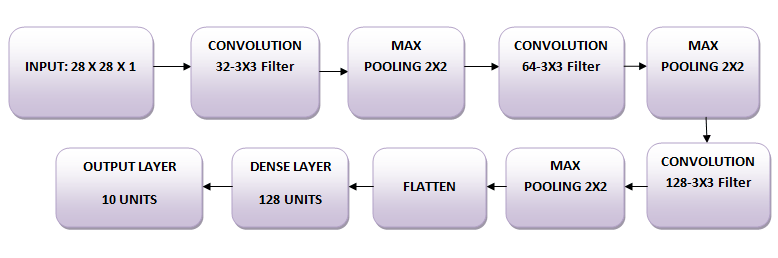




**MODEL THE DATA**


In [ ]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU





In [ ]:

#set batch size and number of epochs
batch_size = 64
epochs = 20
num_classes = 10

In [ ]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
#Compile the Model

#use optimizer and metrics parameter
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
#Let's visualize the layers that you created in the above step by using the summary function.
#This will show some parameters (weights and biases) in each layer and also the total parameters in your model.

fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [ ]:
#Train the Model  for the number of epochs set
#keras fit()  will return a history object
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
750/750 [==============================] - 36s 5ms/step - loss: 0.6675 - accuracy: 0.7523 - val_loss: 0.3361 - val_accuracy: 0.8764
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2924 - accuracy: 0.8929 - val_loss: 0.2865 - val_accuracy: 0.8947
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2448 - accuracy: 0.9097 - val_loss: 0.2620 - val_accuracy: 0.9035
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.2069 - accuracy: 0.9236 - val_loss: 0.2447 - val_accuracy: 0.9125
Epoch 5/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1797 - accuracy: 0.9323 - val_loss: 0.2318 - val_accuracy: 0.9182
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1588 - accuracy: 0.9418 - val_loss: 0.2162 - val_accuracy: 0.9226
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1372 - accuracy: 0.9492 - val_loss: 0.2313 - val_accuracy: 0.9216
Epoch

**Model Evaluation on the Test Set**

In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 0.43362948298454285
Test accuracy: 0.9164999723434448


The test accuracy looks impressive. 

Let's put your model evaluation into perspective and plot the accuracy and loss plots between training and validation data



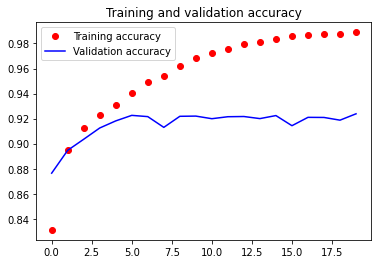

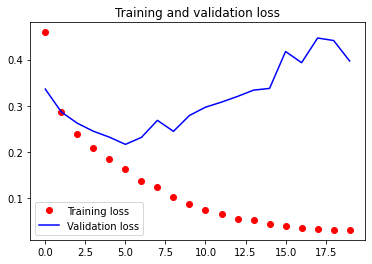

In [ ]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


From the above two plots, you can see that the validation accuracy almost became stagnant after 4-5 epochs and rarely increased at certain epochs. In the beginning, the validation accuracy was linearly increasing with loss, but then it did not increase much.

The validation loss shows that this is the sign of overfitting, similar to validation accuracy it linearly decreased but after 4-5 epochs, it started to increase. This means that the model tried to memorize the data and succeeded.

With this in mind, it's time to introduce some dropout into our model and see if it helps in reducing overfitting.


**Adding Dropout to minimize overfitting**


 Dropout randomly turns off a fraction of neurons during the training process, reducing the dependency on the training set by some amount. How many fractions of neurons you want to turn off is decided by a hyperparameter, which can be tuned accordingly. This way, turning off some neurons will not allow the network to memorize the training data since not all the neurons will be active at the same time and the inactive neurons will not be able to learn anything.

 

In [ ]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))
fashion_model.summary()


#set batch size and number of epochs
batch_size = 64
epochs = 20
num_classes = 10


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 4s 5ms/step - loss: 0.8593 - accuracy: 0.6783 - val_loss: 0.3786 - val_accuracy: 0.8597
Epoch 2/20
750/750 [==============================] - 3s 5ms/step - loss: 0.4010 - accuracy: 0.8529 - val_loss: 0.3252 - val_accuracy: 0.8790
Epoch 3/20
750/750 [==============================] - 3s 5ms/step - loss: 0.3382 - accuracy: 0.8710 - val_loss: 0.2883 - val_accuracy: 0.8929
Epoch 4/20
750/750 [==============================] - 3s 5ms/step - loss: 0.3087 - accuracy: 0.8852 - val_loss: 0.2663 - val_accuracy: 0.9017
Epoch 5/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2843 - accuracy: 0.8934 - val_loss: 0.2558 - val_accuracy: 0.9047
Epoch 6/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2705 - accuracy: 0.8998 - val_loss: 0.2364 - val_accuracy: 0.9130
Epoch 7/20
750/750 [==============================] - 3s 5ms/step - loss: 0.2588 - accuracy: 0.9034 - val_loss: 0.2357 - val_accuracy: 0.9141
Epoch 

In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.2201 - accuracy: 0.9209


In [ ]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.22006657719612122
Test accuracy: 0.9208999872207642


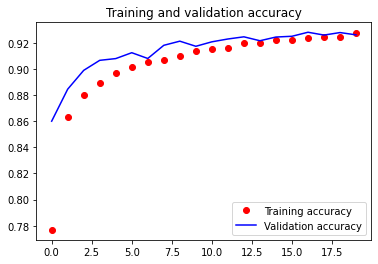

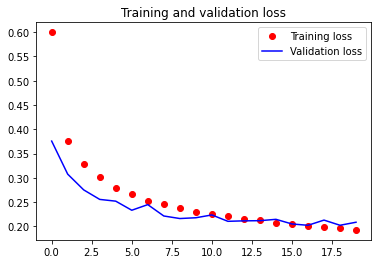

In [ ]:
#lets plot again to see if model still overfitting
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Finally, you can see that the validation loss and validation accuracy both are in sync with the training loss and training accuracy. Even though the validation loss and accuracy line are not linear, but it shows that your model is not overfitting: the validation loss is decreasing and not increasing, and there is not much gap between training and validation accuracy.

**PREDICT CLASSES**

Since the predictions you get are floating point values, it will not be feasible to compare the predicted labels with true test labels. So, you will round off the output which will convert the float values into an integer. Further, you will use np.argmax() to select the index number which has a higher value in a row.

For example, let's assume a prediction for one test image to be 0 1 0 0 0 0 0 0 0 0, the output for this should be a class label 1.

In [ ]:
#Predict Labels
predicted_classes = fashion_model.predict(test_X)

predicted_classes = np.argmax(np.round(predicted_classes),axis=1)


In [ ]:
correct = np.where(predicted_classes==test_Y)[0]
print("correct labels found", len(correct))

correct labels found 9178


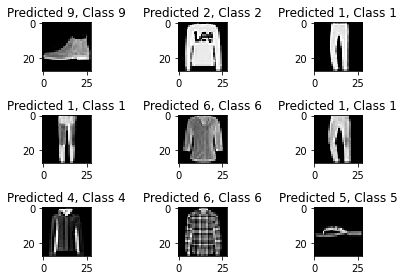

In [ ]:
 #lets see the predicted output for some images

for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

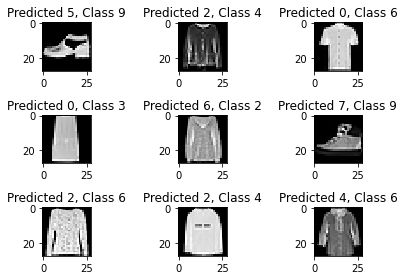

In [ ]:
#lets see some incorrect predictions
incorrect = np.where(predicted_classes!=test_Y)[0]
 
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

**Classification Report**
Classification report will help us in identifying the misclassified classes in more detail. You will be able to observe for which class the model performed bad out of the given ten classes.


In [ ]:

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.91      0.84      1000
     Class 1       0.99      0.98      0.99      1000
     Class 2       0.91      0.86      0.88      1000
     Class 3       0.93      0.92      0.92      1000
     Class 4       0.85      0.91      0.88      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.83      0.69      0.76      1000
     Class 7       0.97      0.98      0.97      1000
     Class 8       0.99      0.99      0.99      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



**Save the model**

 Save the model so that you can directly load it and not have to train it again for 20 epochs. This way, you can load the model later on if you need it and modify the architecture; Alternatively, you can start the training process on this saved model. It is always a good idea to save the model -and even the model's weights!- because it saves you time.  



In [ ]:
fashion_model.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets
